<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [39]:
import re
import string
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [28]:
df = pd.read_csv('data/job_listings.csv', index_col=0)

df

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
5,b'<div>Create various Business Intelligence An...,Data Scientist
6,b'<div><p>As Spotify Premium swells to over 96...,Associate Data Scientist – Premium Analytics
7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist
8,"b""<ul><li>MS in a quantitative discipline such...",Sr. Data Scientist
9,b'<div><p>Slack is hiring experienced data sci...,"Data Scientist, Lifecyle"


## 2) Use Spacy to tokenize / clean the listings 

In [29]:
nlp = spacy.load("en_core_web_lg")

In [30]:
def get_text(text):
    return BeautifulSoup(text).get_text()

def replace_ns(text):
    return text.replace("\\n", " " )

def strips_bs(text):
    return text.strip("b '")

def lower(text):
    return text.lower()

In [31]:
df['description'] = df['description'].apply(get_text)
df['description'] = df['description'].apply(replace_ns)
df['description'] = df['description'].apply(strips_bs)
df['description'] = df['description'].apply(lower)

df

,description,title
0,"""job requirements: conceptual understanding in...",Data scientist
1,"job description as a data scientist 1, you wi...",Data Scientist I
2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,"$4,969 - $6,756 a monthcontractunder the gener...",Data Scientist
4,location: usa \xe2\x80\x93 multiple locations ...,Data Scientist
5,create various business intelligence analytica...,Data Scientist
6,as spotify premium swells to over 96m subscrib...,Associate Data Scientist – Premium Analytics
7,"""everytown for gun safety, the nation's larges...",Data Scientist
8,"""ms in a quantitative discipline such as stati...",Sr. Data Scientist
9,slack is hiring experienced data scientists to...,"Data Scientist, Lifecyle"


In [32]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
            
    return lemmas

In [33]:
df['tokens'] = df['description'].apply(get_lemmas)

df

,description,title,tokens
0,"""job requirements: conceptual understanding in...",Data scientist,"[job, requirement, conceptual, understanding, ..."
1,"job description as a data scientist 1, you wi...",Data Scientist I,"[job, description, , data, scientist, 1, help..."
2,as a data scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, work, consult, business, res..."
3,"$4,969 - $6,756 a monthcontractunder the gener...",Data Scientist,"[$, 4,969, $, 6,756, monthcontractunder, gener..."
4,location: usa \xe2\x80\x93 multiple locations ...,Data Scientist,"[location, usa, \xe2\x80\x93, multiple, locati..."
5,create various business intelligence analytica...,Data Scientist,"[create, business, intelligence, analytical, r..."
6,as spotify premium swells to over 96m subscrib...,Associate Data Scientist – Premium Analytics,"[spotify, premium, swell, 96, m, subscriber, g..."
7,"""everytown for gun safety, the nation's larges...",Data Scientist,"[everytown, gun, safety, nation, large, gun, v..."
8,"""ms in a quantitative discipline such as stati...",Sr. Data Scientist,"[ms, quantitative, discipline, statistic, math..."
9,slack is hiring experienced data scientists to...,"Data Scientist, Lifecyle","[slack, hire, experienced, datum, scientist, j..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [34]:
vect = CountVectorizer(stop_words = 'english')

df['tokens'] = df['tokens'].apply(' '.join)

vect.fit(df['tokens'])

dtm = vect.transform(df['tokens'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [35]:
word_ranks = dtm.sum().sort_values(ascending=False)
word_ranks

datum                    3398
experience               1959
work                     1654
team                     1373
xe2                      1366
x80                      1353
business                 1264
data                     1067
science                   989
product                   896
analytic                  836
model                     822
analysis                  812
learning                  769
skill                     720
scientist                 710
machine                   707
build                     632
develop                   625
opportunity               584
solution                  580
statistical               576
problem                   568
customer                  562
help                      560
include                   557
x99s                      555
ability                   553
drive                     543
technology                539
                         ... 
patience                    1
detailpassionate            1
pave      

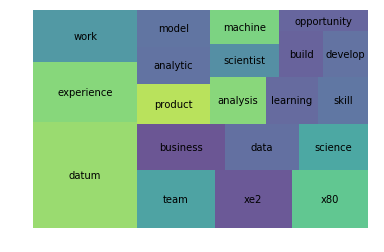

In [36]:
import squarify

squarify.plot(sizes=word_ranks.values[:20], label=word_ranks.index[:20], alpha=0.8)
plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [37]:
tfidf = TfidfVectorizer(stop_words = 'english')

sparse = tfidf.fit_transform(df['tokens'])

dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.110834,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [40]:
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [42]:
nn.kneighbors(dtm)

(array([[0.        , 1.2753167 , 1.302155  , 1.30708911, 1.30909277],
        [0.        , 1.22440244, 1.23726097, 1.23760041, 1.24038433],
        [0.        , 1.22513028, 1.23251592, 1.23421417, 1.25080544],
        ...,
        [0.        , 0.        , 1.2821581 , 1.28999774, 1.29411647],
        [0.        , 0.03669412, 1.1921821 , 1.23358771, 1.23703105],
        [0.        , 1.23175504, 1.25096874, 1.25406759, 1.25797128]]),
 array([[  0, 276, 274, 336, 366],
        [  1, 201, 399, 351, 216],
        [  2, 307, 318, 407, 357],
        ...,
        [423,  44, 363, 397, 132],
        [424, 382, 201, 366, 383],
        [425, 201, 406, 292, 264]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 